# Dict generation

In [1]:
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data ={i : randn() for i in range(8)}

In [3]:
print(data)

{0: -0.5267268691736529, 1: -0.4233340629791632, 2: 0.10529182265922674, 3: 0.10782398360883386, 4: 1.023846390257573, 5: -0.8381935530356031, 6: 0.4313019331272286, 7: 0.4094093446479599}


## operation system

In [4]:
!dir *.ipynb

 Volume in drive D has no label.
 Volume Serial Number is FA5B-9D44

 Directory of D:\git\python

11/28/2015  11:38 PM           349,490 book_python_data_demo.ipynb
               1 File(s)        349,490 bytes
               0 Dir(s)  20,986,851,328 bytes free


## magic operation

In [5]:
%run printscript.py

This is a test to embed printscript.py in ipython notebook


In [6]:
%timeit method1 = [x for x in ["a" , "bc"] *10000 if x.startswith('a')]
%timeit method2 = [x for x in ["a" , "bc"] *10000 if x[:3] == 'a']

100 loops, best of 3: 4.67 ms per loop
100 loops, best of 3: 2.76 ms per loop


## numpy arrary

### (1) create array

In [7]:
data1 = [[[1,2,1,2],[3,4,3,4]],[[5,6,5,6],[7,8,7,8]],[[9,10,7,8],[11,12,11,12]]]

In [8]:
arr1 = np.array(data1, dtype=np.int8)

In [9]:
arr1

array([[[ 1,  2,  1,  2],
        [ 3,  4,  3,  4]],

       [[ 5,  6,  5,  6],
        [ 7,  8,  7,  8]],

       [[ 9, 10,  7,  8],
        [11, 12, 11, 12]]], dtype=int8)

In [10]:
##########################array discriptions########################
print("array dimension: " +str(arr1.ndim))
print("array shape: " +str(arr1.shape))
print("array element shape (row, column): " +str(arr1[0].shape))
print("array data type:" + str(arr1.dtype))
print("--array data type can be int/float 8 16 32 64, complex or object--")

array dimension: 3
array shape: (3, 2, 4)
array element shape (row, column): (2, 4)
array data type:int8
--array data type can be int/float 8 16 32 64, complex or object--


### (2) array calculation

In [11]:
print("----------all plus one for each element and astype convert float to int: ----------")
arr2 = arr1+np.ones((3,2,4)).astype(np.int8)
arr2

----------all plus one for each element and astype convert float to int: ----------


array([[[ 2,  3,  2,  3],
        [ 4,  5,  4,  5]],

       [[ 6,  7,  6,  7],
        [ 8,  9,  8,  9]],

       [[10, 11,  8,  9],
        [12, 13, 12, 13]]], dtype=int8)

In [12]:
print("----------Only plus diagonal one first element: +np.eye(2) ---------")
arr2[:1, :2, :2]+np.eye(2)*20

----------Only plus diagonal one first element: +np.eye(2) ---------


array([[[ 22.,   3.],
        [  4.,  25.]]])

In [13]:
arr2[0][:2, :2]+np.eye(2)*20

array([[ 22.,   3.],
       [  4.,  25.]])

In [14]:
print("----------convert str array to num and to float in array ----------")
str_num = np.array(['1.2','3.4'], dtype=np.string_)
str_num_float = str_num.astype(np.float)
str_num_float

----------convert str array to num and to float in array ----------


array([ 1.2,  3.4])

In [15]:
int_array =  np.arange(10)
print("---------------np.arrange data type:  " + str(int_array.dtype)+ "---------")
int_array.astype(str_num_float.dtype)

---------------np.arrange data type:  int32---------


array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [16]:
print("                 -----------------------------------------------------")
print("                 --------------Vectorization-calculations-------------")
print("                 -----------------------------------------------------")
1/int_array[1:]  # get rid of zero as inf

                 -----------------------------------------------------
                 --------------Vectorization-calculations-------------
                 -----------------------------------------------------


array([ 1.        ,  0.5       ,  0.33333333,  0.25      ,  0.2       ,
        0.16666667,  0.14285714,  0.125     ,  0.11111111])

###(3) slicing (with pointer) and with copy()

In [17]:
print("                                    ------------------np.arange--------------")
int_array_2 = np.arange(5)
int_array_2

                                    ------------------np.arange--------------


array([0, 1, 2, 3, 4])

In [18]:
int_array_2_slice = int_array_2 [0:3]
int_array_2_slice [1:] =100
int_array_2

array([  0, 100, 100,   3,   4])

In [19]:
# int_array_2 will not change if use copy and slice
int_array_3 = int_array_2.copy()
int_array_3_slice = int_array_3 [0:3]
int_array_3_slice [1:] =200
int_array_2

array([  0, 100, 100,   3,   4])

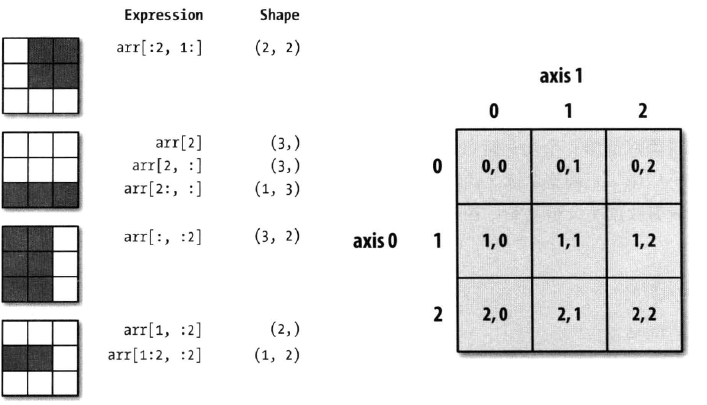

In [20]:
from IPython.display import Image
Image(filename='array_slicing.png', width = 500)

###>>                  Boolen slicing (operate on the copy, judge on each element  array[ array < 0])

In [21]:
# Boolen index
# suppose 4 stores, 6 categories (some overlap)
category = np.array(['book','food','music','food','etc','book'])
price_matrix = randn(6,4)
price_matrix

array([[-1.22521206,  1.32999167,  0.51602068,  0.8099177 ],
       [ 0.03665969,  0.19783734,  1.2380113 ,  0.80293632],
       [-0.84443752, -0.1548549 ,  1.05643857,  1.17152161],
       [ 1.05292651,  0.12883991,  1.18068226, -0.35745214],
       [-0.61794787,  0.95668389, -0.47451539,  0.13699314],
       [-1.09091196, -0.362634  ,  0.29397527, -0.84681781]])

In [22]:
# get average price of all books in each stores
price_book = price_matrix[category == "book"]
print("types of books:" + str(price_book.shape[0])+"\n")
print("Average price across all books")
sum(price_book)/price_book.shape[0]

types of books:2

Average price across all books


array([-1.15806201,  0.48367883,  0.40499797, -0.01845006])

In [23]:
price_nonbook = price_matrix[ - (category == "book")]
print("types of nonbooks:" + str(price_nonbook.shape[0])+"\n")
print("Average price across non books")
sum(price_nonbook)/price_nonbook.shape[0]

types of nonbooks:4

Average price across non books


array([-0.0931998 ,  0.28212656,  0.75015419,  0.43849973])

In [24]:
price_nonbook

array([[ 0.03665969,  0.19783734,  1.2380113 ,  0.80293632],
       [-0.84443752, -0.1548549 ,  1.05643857,  1.17152161],
       [ 1.05292651,  0.12883991,  1.18068226, -0.35745214],
       [-0.61794787,  0.95668389, -0.47451539,  0.13699314]])

In [25]:
# modify negative element to 1
price_nonbook [price_nonbook < 0] = 1
price_nonbook

array([[ 0.03665969,  0.19783734,  1.2380113 ,  0.80293632],
       [ 1.        ,  1.        ,  1.05643857,  1.17152161],
       [ 1.05292651,  0.12883991,  1.18068226,  1.        ],
       [ 1.        ,  0.95668389,  1.        ,  0.13699314]])

In [26]:
# Bool only operate on the copy, price_matrix unchanged
price_matrix

array([[-1.22521206,  1.32999167,  0.51602068,  0.8099177 ],
       [ 0.03665969,  0.19783734,  1.2380113 ,  0.80293632],
       [-0.84443752, -0.1548549 ,  1.05643857,  1.17152161],
       [ 1.05292651,  0.12883991,  1.18068226, -0.35745214],
       [-0.61794787,  0.95668389, -0.47451539,  0.13699314],
       [-1.09091196, -0.362634  ,  0.29397527, -0.84681781]])

###>>> Point selection with 0 axis(x) array and 1 axis(y) array np.ix_

In [27]:
arr_fancy = np.arange(32).reshape((8,4))
arr_fancy

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [28]:
arr_fancy[np.ix_([7,5,2,1],[3,2,1])]

array([[31, 30, 29],
       [23, 22, 21],
       [11, 10,  9],
       [ 7,  6,  5]])

In [29]:
arr_fancy.transpose()

array([[ 0,  4,  8, 12, 16, 20, 24, 28],
       [ 1,  5,  9, 13, 17, 21, 25, 29],
       [ 2,  6, 10, 14, 18, 22, 26, 30],
       [ 3,  7, 11, 15, 19, 23, 27, 31]])

##(4) ufunc element calculation

In [30]:
arr_ufunc = np.arange(24).reshape(2, 3, 4)
arr_ufunc

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [31]:
np.log1p(arr_ufunc)

array([[[ 0.        ,  0.69314718,  1.09861229,  1.38629436],
        [ 1.60943791,  1.79175947,  1.94591015,  2.07944154],
        [ 2.19722458,  2.30258509,  2.39789527,  2.48490665]],

       [[ 2.56494936,  2.63905733,  2.7080502 ,  2.77258872],
        [ 2.83321334,  2.89037176,  2.94443898,  2.99573227],
        [ 3.04452244,  3.09104245,  3.13549422,  3.17805383]]])

In [32]:
import math
np.power(math.e,np.log1p(arr_ufunc))-1

array([[[  0.,   1.,   2.,   3.],
        [  4.,   5.,   6.,   7.],
        [  8.,   9.,  10.,  11.]],

       [[ 12.,  13.,  14.,  15.],
        [ 16.,  17.,  18.,  19.],
        [ 20.,  21.,  22.,  23.]]])

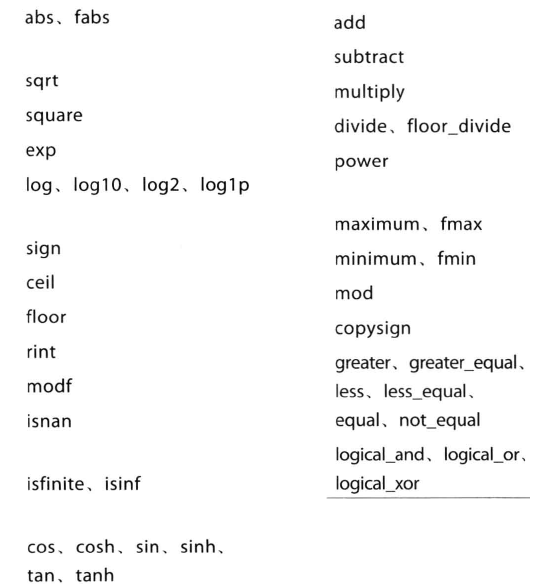

In [33]:
Image(filename='ufunc_array.png',width=400)

In [34]:
np.meshgrid?

###(5) *****Array vectorization**( replace loop)

In [35]:
## generate (x,y) point matrix xs ys
points = np.arange(-10,10,0.01)
xs, ys = np.meshgrid(points, points)

In [36]:
ys

array([[-10.  , -10.  , -10.  , ..., -10.  , -10.  , -10.  ],
       [ -9.99,  -9.99,  -9.99, ...,  -9.99,  -9.99,  -9.99],
       [ -9.98,  -9.98,  -9.98, ...,  -9.98,  -9.98,  -9.98],
       ..., 
       [  9.97,   9.97,   9.97, ...,   9.97,   9.97,   9.97],
       [  9.98,   9.98,   9.98, ...,   9.98,   9.98,   9.98],
       [  9.99,   9.99,   9.99, ...,   9.99,   9.99,   9.99]])

In [37]:
xs

array([[-10.  ,  -9.99,  -9.98, ...,   9.97,   9.98,   9.99],
       [-10.  ,  -9.99,  -9.98, ...,   9.97,   9.98,   9.99],
       [-10.  ,  -9.99,  -9.98, ...,   9.97,   9.98,   9.99],
       ..., 
       [-10.  ,  -9.99,  -9.98, ...,   9.97,   9.98,   9.99],
       [-10.  ,  -9.99,  -9.98, ...,   9.97,   9.98,   9.99],
       [-10.  ,  -9.99,  -9.98, ...,   9.97,   9.98,   9.99]])

In [38]:
z = np.sqrt (xs **2 + ys **2)
z.shape

(2000, 2000)

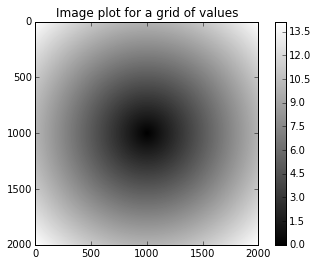

In [39]:
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot for a grid of values")

###(6) array logic transformation with np.where

In [40]:
# numpy.where if conditin else y
Man_arr = np.array(["Alex","Michael","John","Bob"])
Woman_arr = np.array(["Lucy","Maggie","Kate","Catherine"])
Choose_arr = np.array([True, False, True, False])

In [41]:
#select True for Man, False for woman
Combine = [(x if c else y) for x,y,c in zip(Man_arr,Woman_arr,Choose_arr)]
Combine

['Alex', 'Maggie', 'John', 'Catherine']

In [45]:
Combine = np.where(Choose_arr, Man_arr, Woman_arr)
Combine

array(['Alex', 'Maggie', 'John', 'Catherine'], 
      dtype='<U9')

In [50]:
where_arr = np.arange(16).reshape(4,4)
where_arr 

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [66]:
# certain range get negative, if not divided by 2 transform to zero 
np.where( (where_arr >=5) & (where_arr <= 6) |(where_arr >=9) & (where_arr <= 10), \
         -where_arr, np.where((where_arr % 2 !=0), 0, where_arr))

array([[  0,   0,   2,   0],
       [  4,  -5,  -6,   0],
       [  8,  -9, -10,   0],
       [ 12,   0,  14,   0]])

### (7) Array math statistics 

In [70]:
# simulate standard distribution result e.g. lottery
lottery_arr = np.random.randn(100,100)
lottery_arr.shape

(100, 100)

In [74]:
flatten_lottery=[item for sublist in lottery_arr.tolist() for item in sublist]

In [81]:
len(flatten_lottery)

10000

(array([   1.,    3.,    2.,    8.,   11.,   37.,   49.,   76.,  150.,
         248.,  345.,  453.,  619.,  718.,  934.,  995.,  975.,  926.,
         872.,  744.,  571.,  433.,  300.,  224.,  123.,   86.,   46.,
          27.,   16.,    8.]),
 array([-4.02694218, -3.78110563, -3.53526909, -3.28943254, -3.04359599,
        -2.79775945, -2.5519229 , -2.30608635, -2.06024981, -1.81441326,
        -1.56857671, -1.32274017, -1.07690362, -0.83106707, -0.58523053,
        -0.33939398, -0.09355743,  0.15227911,  0.39811566,  0.64395221,
         0.88978876,  1.1356253 ,  1.38146185,  1.6272984 ,  1.87313494,
         2.11897149,  2.36480804,  2.61064458,  2.85648113,  3.10231768,
         3.34815422]),
 <a list of 30 Patch objects>)

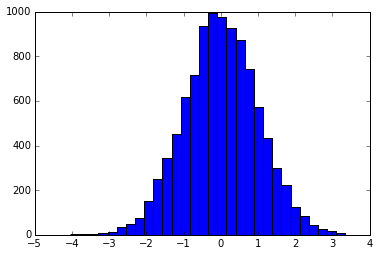

In [85]:
plt.hist(flatten_lottery, bins=30)

In [86]:
np.mean(flatten_lottery)

0.00091108461623707986

In [87]:
np.std(flatten_lottery)

0.99778358289013269

In [89]:
# calculate along axis example, reduce dimension or not
data_math_arr = np.arange(16).reshape(4,4)
data_math_arr 

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [95]:
print("stat. along axis 1, keep axis index")
data_math_arr.sum(axis =1)

stat along axis 1, keep axis index


array([ 6, 22, 38, 54])

In [94]:
print("stat. along axis 1, but cumulative to the last element")
data_math_arr.cumsum(axis =1)

array([[ 0,  1,  3,  6],
       [ 4,  9, 15, 22],
       [ 8, 17, 27, 38],
       [12, 25, 39, 54]], dtype=int32)

In [96]:
data_math_arr.cumprod(axis =1)

array([[    0,     0,     0,     0],
       [    4,    20,   120,   840],
       [    8,    72,   720,  7920],
       [   12,   156,  2184, 32760]], dtype=int32)

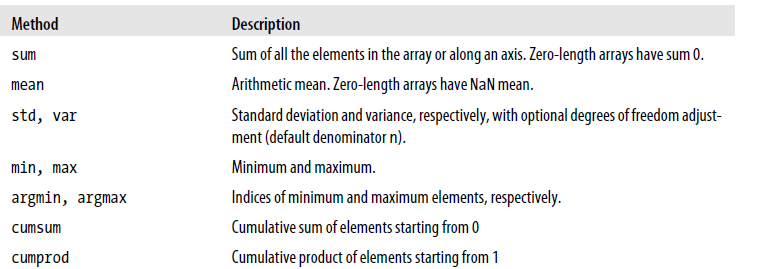

In [97]:
Image(filename="numpy_math.PNG")

In [ ]:
###(8) Boolean 